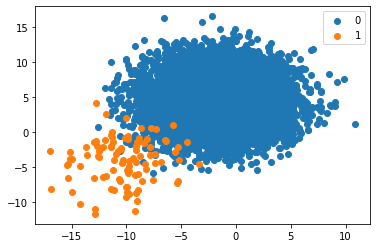

In [4]:
# create and plot synthetic dataset with a given class distribution
from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs
# create a dataset with a given class distribution
def get_dataset(proportions):
    # determine the number of classes
    n_classes = len(proportions)
    # determine the number of examples to generate for each class
    largest = max([v for k,v in proportions.items()])
    n_samples = largest * n_classes
    # create dataset
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1,
    cluster_std=3)
    # collect the examples
    X_list, y_list = list(), list()
    for k,v in proportions.items():
        row_ix = where(y == k)[0]
        selected = row_ix[:v]
        X_list.append(X[selected, :])
        y_list.append(y[selected])
    return vstack(X_list), hstack(y_list)

# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
    # create scatter plot for samples from each class
    n_classes = len(unique(y))
    for class_value in range(n_classes):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)[0]
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
    # show a legend
    pyplot.legend()
    # show the plot
    pyplot.show()
# define the class distribution
proportions = {0:10000, 1:100}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)
